<a href="https://colab.research.google.com/github/PhilHen99/machine_learning/blob/master/E1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Evaluación 1 - Machine Learning**


## **Sección 1**
Genere las siguientes imágenes de manera sintética. \\
**NOTA:** NO USE FUNCIONES DE LIBRERÍAS DE PROCESAMIENTO DE IMÁGENES (CV, PIL, SKIMAGE). USE SÓLO OPERACIONES CON ARREGLOS

In [ ]:
# Import some libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
from google.colab import drive
from google.colab import files
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Ejercicio 1**

Genere la siguiente imagen [resultado](https://drive.google.com/file/d/1FjNEt4uG1svgiDlMsmv3-CVR1qcciduh/view?usp=share_link). \\
**NOTA:** En la salida de la celda puede encontrar el tamaño de la imagen final.

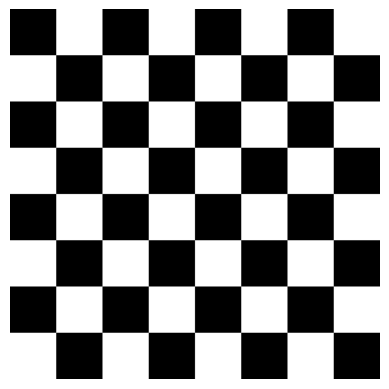

In [ ]:
# Lea la imagen
#image =

# Realice aquí todas las operaciones que necesite. Puede añadir cuantas celdas de código requiera


# Step 1, creating the pattern with an array
checkerboard = np.zeros((8, 8), dtype=int)
#Odd
checkerboard[1::2, ::2] = 1
#Even
checkerboard[::2, 1::2] = 1

# Paso 2: Scaling the pattern, depending of the value, it would change, in this case knowing that the board is squared, i used 100x100
checkerboard = np.kron(checkerboard, np.ones((100, 100)))

# Paso 3: converting the image to RGB(using the number 3 for the 3 channels, and 255 to cover the rgb range, if it's changed, the colors of the white part are modified)
checkerboard_img = np.stack([checkerboard * 255] * 3, axis=-1).astype(np.uint8)

# Paso 4: saving the image
cv2.imwrite('checkerboard.png', checkerboard_img)

# Mostrar la imagen usando matplotlib
plt.imshow(checkerboard_img)
plt.axis('off')

# Muestre la imagen y guardela en drive usando opencv (consultar)
cv2.imwrite('checkerboard.png', checkerboard_img)
plt.imshow(checkerboard_img)
plt.axis('off')
cv2.imwrite('/content/drive/MyDrive/Machine Learning/checkerboard.png', checkerboard_img)
plt.show()

### **Ejercicio 2**

Genere la siguiente imagen [resultado](https://drive.google.com/file/d/17di2XK8PaFOA-d0IYVKfZAnTn2XC_JJH/view?usp=share_link). \\
**NOTA:** En la salida de la celda puede encontrar el tamaño de la imagen final.

True

<Figure size 640x480 with 0 Axes>

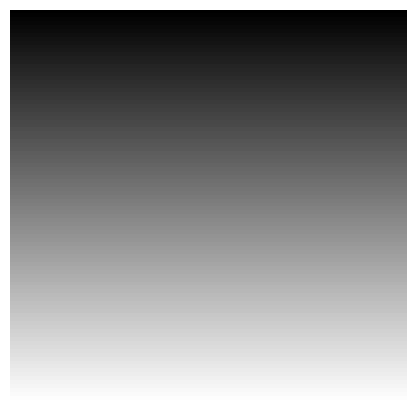

In [ ]:
# Lea la imagen
#image =

# Realice aquí todas las operaciones que necesite. Puede añadir cuantas celdas de código requiera

plt.figure()
#this is were the gradient is created, where an step size of 0.01 is made. and the outer is for the 2d array
a=np.outer(np.arange(0,1,0.01),np.ones(10))
#the value of each key is a list of tuples were each one represents a point in the gradient, the start of 0.0 represents a black colr, and the end with 1,1,1 represents the white.
gradient = {'red': [(0.0, 0.0, 0.0), (1.0, 1.0, 1.0)],
         'green': [(0.0, 0.0, 0.0), (1.0, 1.0, 1.0)],
         'blue': [(0.0, 0.0, 0.0), (1.0, 1.0, 1.0)]}
#the creation of the colormap, the 256 is the number of discrete colors
gradient = matplotlib.colors.LinearSegmentedColormap('my_colormap2',gradient,256)
plt.figure(figsize=(512/100, 512/100))  # Adjusting the figure size to 512x512 pixels
plt.imshow(a,aspect='auto', cmap =gradient)
plt.axis('off')


# Muestre la imagen y guardela en drive usando opencv (consultar)

plt.figure(figsize=(512/100, 512/100))
plt.imshow(a, aspect='auto', cmap=gradient)
plt.axis('off')
plt.savefig('gradient_image.png', bbox_inches='tight', pad_inches=0)
plt.close()

img = cv2.imread('exerc2.png')
output_path = '/content/drive/MyDrive/Machine Learning/exerc2.png'
cv2.imwrite(output_path, img)

## **Sección 2**

Genere las siguientes imágenes usando recorridos por píxeles a partir de [lena.jpg](https://drive.google.com/file/d/1gH5sJN__2g7f9ndLhLvTECdOBJIGUbg_/view?usp=sharing) \\
**NOTA:** NO USE FUNCIONES DE LIBRERÍAS DE PROCESAMIENTO DE IMÁGENES (CV, PIL, SKIMAGE). USE SÓLO OPERACIONES CON ARREGLOS

### **Ejercicio 3**

Genere la siguiente imagen [resultado](https://drive.google.com/file/d/1-199t6nftWQoXFkp4JbVFUuHsTcedbyi/view?usp=sharing). \\
**NOTA:** En la salida de la celda puede encontrar el tamaño de la imagen final.

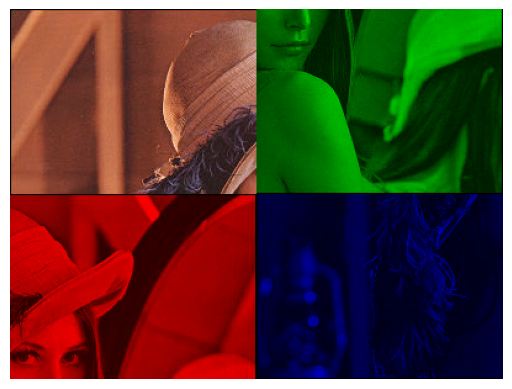

In [ ]:
# Lea la imagen
image_path = '/content/lena.jpg'
image = cv2.imread(image_path)

# Realice aquí todas las operaciones que necesite. Puede añadir cuantas celdas de código requiera

# Convert the image from BGR (knowing that is the default from the library) to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get the dimensions of the image
height, width, _ = image.shape

# here the image splits into 4 quadrants
roi_1 = image[0:height//2, 0:width//2]  # Top-left (1st quadrant)
roi_2 = image[0:height//2, width//2:width]  # Top-right (2nd quadrant)
roi_3 = image[height//2:height, 0:width//2]  # Bottom-left (3rd quadrant)
roi_4 = image[height//2:height, width//2:width]  # Bottom-right (4th quadrant)

#red
roi_2[:, :, 1] = 0
roi_2[:, :, 2] = 0

#blue
roi_3[:, :, 0] = 0
roi_3[:, :, 1] = 0

#green
roi_4[:, :, 0] = 0
roi_4[:, :, 2] = 0

top = np.hstack([roi_1, roi_4])  # Combine the original bottom-right part with the top-left part this convo is a pain in the a** to get it done
bottom = np.hstack([roi_2, roi_3])  # Combine the top-right part with the bottom-left part

# Combine the top and bottom rows
final_image = np.vstack([top, bottom])
# Muestre la imagen y guardela en drive usando opencv (consultar)
output_path = '/content/drive/MyDrive/Machine Learning/lena_1.png'
cv2.imwrite(output_path, cv2.cvtColor(final_image, cv2.COLOR_RGB2BGR))  # Convert RGB to BGR for saving

plt.imshow(final_image)
plt.axis('off')  # Hide axes
plt.show()

### **Ejercicio 4**

Genere la siguiente imagen [resultado](https://drive.google.com/file/d/1-9jWSwRb1ld_xN6iHTHVKT92bGat0I4s/view?usp=sharing). \\
**NOTA:** En la salida de la celda puede encontrar el tamaño de la imagen final.

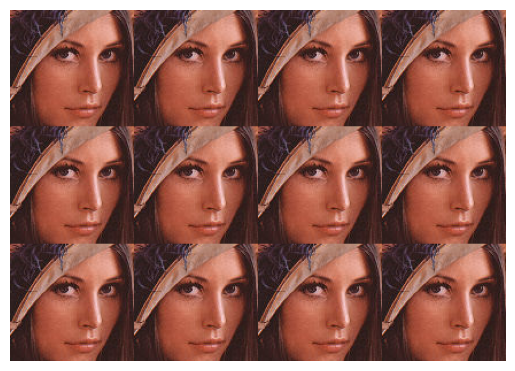

In [ ]:
# Lea la imagen

image_path = '/content/lena.jpg'
image = cv2.imread(image_path)

# Realice aquí todas las operaciones que necesite. Puede añadir cuantas celdas de código requiera
#converting the image to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#getting the dimensions of the image
height, width, _ = image.shape

# Here is where the crop of the image is selected
# i have to play with those values a lot, they are very sensitive
x_start, y_start = int(width * 0.41), int(height * 0.31)
x_end, y_end = int(width * 0.68), int(height * 0.65)

# Crop the image
face_roi = image[y_start:y_end, x_start:x_end]

# Define the number of repetitions
rows = 3  # Number of rows
cols = 4  # Number of columns

# Create the tiled image
tiled_image = np.tile(face_roi, (rows, cols, 1))

# Display the tiled image


# Muestre la imagen y guardela en drive usando opencv (consultar)

output_path = '/content/drive/MyDrive/Machine Learning/modified_lena_exerc4.png'
cv2.imwrite(output_path, cv2.cvtColor(tiled_image, cv2.COLOR_RGB2BGR))

# Saving the image using OpenCV
plt.imshow(tiled_image)
plt.axis('off')
plt.show()

### **Ejercicio 5**

Genere la siguiente imagen [resultado](https://drive.google.com/file/d/1Ui2Dehuu7VzMvIZPC2TAa6lHZwhTDtTX/view?usp=share_link) (línea negra en la esquina superior izquierda) \\
**NOTA:** En la salida de la celda puede encontrar el tamaño de la imagen final.

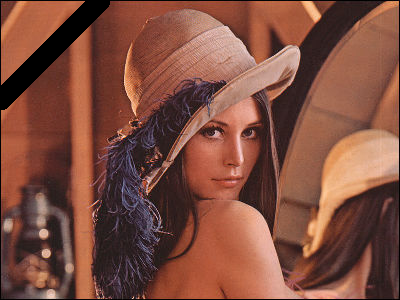

In [ ]:
# Lea la imagen
image_path = '/content/lena.jpg'
image = cv2.imread(image_path)

# Realice aquí todas las operaciones que necesite. Puede añadir cuantas celdas de código requiera

# Get image dimensions
height, width, channels = image.shape

# Draw a black line (starting with the first two parenthesis who are the start and ending position of this line in x and y so first one is x=0 and y =100, and the third is the colors on the rgb scale, thickness, well, is thickness, nothing to explain)
cv2.line(image, (0, 100), (100, 0), (0, 0, 0), thickness=20)  # Adjust parameters as needed

# Muestre la imagen y guardela en drive usando opencv (consultar)
output_path = '/content/drive/MyDrive/Machine Learning/modified_lena_exerc5.jpg'
# Saving the image using OpenCV
cv2.imwrite(output_path, image)
cv2_imshow(image)